In [ ]:
# Instalação das bibliotecas necessárias
!pip install numpy==1.23.5 pgmpy==0.1.21

**!!! Após executar a célula acima, vá em `Runtime > Restart runtime`. Depois, execute as próximas células. !!!**

In [ ]:
# Importações
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import networkx as nx

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, BayesianEstimator
from pgmpy.inference import VariableElimination


In [ ]:
# Carregamento da base
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Dados_Completos.csv")

Saving Dados_Completos.csv to Dados_Completos.csv


para fazer a análise outros cultivos basta mudar a relação do 'Produto'

In [ ]:
# Filtragem para trigo
df_trigo = df[df['Produto'] == '1.17 Trigo'].dropna()

colunas = [
    'Temperatura Media',
    'Precipitacao Total',
    'Pressao Atmosferica Media',
    'Vento Velocidade Media',
    'Rendimento Médio (kg/ha)'
]

df_trigo = df_trigo[colunas]
df_trigo.head()

,Temperatura Media,Precipitacao Total,Pressao Atmosferica Media,Vento Velocidade Media,Rendimento Médio (kg/ha)
1195,22.92,201.13,946.27,2.36,2726.0
1204,23.00,130.08,946.48,2.64,3109.0
1213,20.56,167.13,946.92,2.25,3109.0
1222,18.75,112.82,949.04,2.24,3187.0
1231,14.94,108.53,787.51,1.43,3187.0


['1.4 Arroz' '1.8 Feijao (1 Safra)' '1.9 Feijao (2 Safra)'
 '1.10 Feijao (3 Safra)' '1.13 Milho (1 Safra)' '1.14 Milho (2 Safra)'
 '1.15 Soja' '1.17 Trigo' '15 Fumo']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


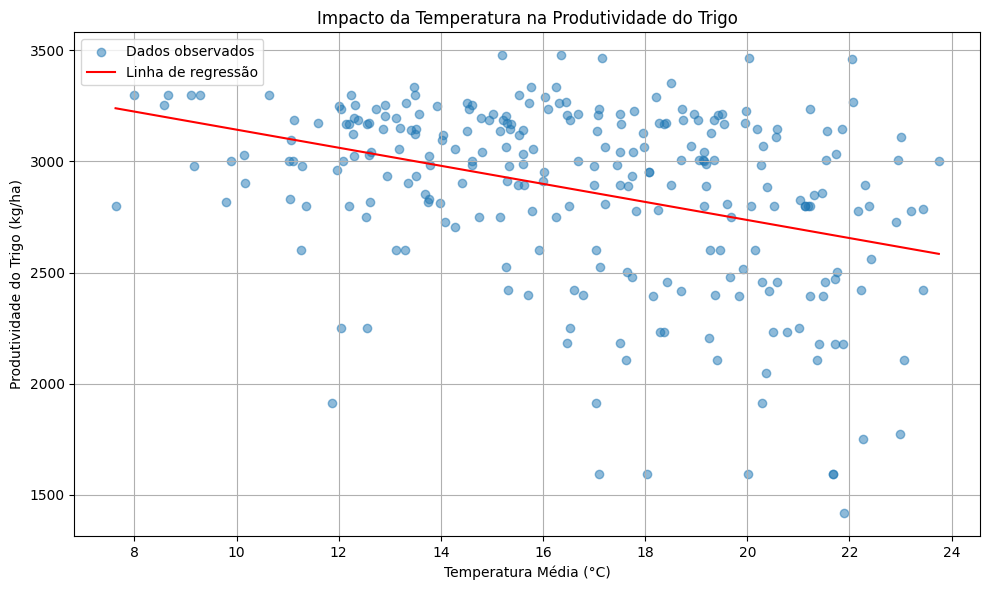

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Confirmar valor correto na base
print(df['Produto'].unique())  # Use para verificar caso necessário

# Filtrar os dados corretamente para TRIGO
df_trigo = df[df['Produto'] == '1.17 Trigo'].dropna()

# Selecionar colunas necessárias
colunas = [
    'Temperatura Media',
    'Precipitacao Total',
    'Pressao Atmosferica Media',
    'Vento Velocidade Media',
    'Rendimento Médio (kg/ha)'
]
df_trigo = df_trigo[colunas]

# Aplicar regressão linear usando apenas Temperatura
X_trigo = df_trigo[['Temperatura Media']]
y_trigo = df_trigo['Rendimento Médio (kg/ha)']

# Checar se há dados suficientes
if len(X_trigo) > 0:
    modelo_trigo = LinearRegression()
    modelo_trigo.fit(X_trigo, y_trigo)

    # Coeficiente e intercepto
    coef_temp_trigo = modelo_trigo.coef_[0]
    intercepto_trigo = modelo_trigo.intercept_

    # Simular previsões para o intervalo de temperatura
    temperaturas_simuladas_trigo = np.linspace(X_trigo.min(), X_trigo.max(), 100).reshape(-1, 1)
    produtividade_prevista_trigo = modelo_trigo.predict(temperaturas_simuladas_trigo)

    # Plotar gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(X_trigo, y_trigo, alpha=0.5, label='Dados observados')
    plt.plot(temperaturas_simuladas_trigo, produtividade_prevista_trigo, color='red', label='Linha de regressão')
    plt.xlabel("Temperatura Média (°C)")
    plt.ylabel("Produtividade do Trigo (kg/ha)")
    plt.title("Impacto da Temperatura na Produtividade do Trigo")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    coef_temp_trigo, intercepto_trigo
else:
    print("Nenhum dado encontrado para o produto")


In [ ]:
# Filtragem para trigo
df_trigo = df[df['Produto'] == '1.17 Trigo'].dropna()

colunas = [
    'Temperatura Media',
    'Precipitacao Total',
    'Pressao Atmosferica Media',
    'Vento Velocidade Media',
    'Rendimento Médio (kg/ha)'
]

df_trigo = df_trigo[colunas]
df_trigo.head()


,Temperatura Media,Precipitacao Total,Pressao Atmosferica Media,Vento Velocidade Media,Rendimento Médio (kg/ha)
1195,22.92,201.13,946.27,2.36,2726.0
1204,23.00,130.08,946.48,2.64,3109.0
1213,20.56,167.13,946.92,2.25,3109.0
1222,18.75,112.82,949.04,2.24,3187.0
1231,14.94,108.53,787.51,1.43,3187.0


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Confere se há dados
if df_trigo.shape[0] > 0:
    discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    df_discretizado_trigo = pd.DataFrame(
        discretizer.fit_transform(df_trigo),
        columns=df_trigo.columns
    ).astype(int)

    print("Discretização realizada com sucesso!")
    display(df_discretizado_trigo.head())
else:
    print("Nenhum dado disponível para discretização")


✅ Discretização realizada com sucesso!


,Temperatura Media,Precipitacao Total,Pressao Atmosferica Media,Vento Velocidade Media,Rendimento Médio (kg/ha)
0,2,2,2,2,0
1,2,1,2,2,1
2,2,2,2,1,1
3,1,1,2,1,2
4,0,1,0,0,2


In [ ]:

from sklearn.model_selection import train_test_split
from pgmpy.estimators import HillClimbSearch, BicScore, BayesianEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.metrics import log_likelihood_score

# Separar os dados discretizados em treino e teste
df_discretizado_trigo = df_discretizado_trigo.reset_index(drop=True)
df_treino_trigo, df_teste_trigo = train_test_split(df_discretizado_trigo, test_size=0.3, random_state=42)

# Aprender a estrutura da rede com os dados de treino
hc = HillClimbSearch(df_treino_trigo)
melhor_modelo = hc.estimate(scoring_method=BicScore(df_treino_trigo), max_indegree=4)

# Construir a rede com as arestas aprendidas
rede_bayesiana_trigo = BayesianNetwork(melhor_modelo.edges())

# Aprender os parâmetros da rede com estimador bayesiano
rede_bayesiana_trigo.fit(df_treino_trigo, estimator=BayesianEstimator)

# Exibir as conexões aprendidas
print("Relações aprendidas na rede da trigo:")
for origem, destino in rede_bayesiana_trigo.edges():
    print(f"{origem} → {destino}")

# Garantir que as colunas do teste estejam corretas
df_teste_trigo = df_teste_trigo[list(rede_bayesiana_trigo.nodes())]

# Avaliação de robustez com log-likelihood
score = log_likelihood_score(rede_bayesiana_trigo, df_teste_trigo)
print(f"\nLog-Likelihood no conjunto de teste (trigo): {score:.2f}")


  0%|          | 0/1000000 [00:00<?, ?it/s]

Relações aprendidas na rede da trigo:
Pressao Atmosferica Media → Temperatura Media
Pressao Atmosferica Media → Rendimento Médio (kg/ha)
Vento Velocidade Media → Pressao Atmosferica Media

Log-Likelihood no conjunto de teste (trigo): -337.91


In [ ]:
# Inferência com temperatura alta
inferencia_trigo = VariableElimination(rede_bayesiana_trigo)
resultado_trigo_temp_alta = inferencia_trigo.query(
    variables=['Rendimento Médio (kg/ha)'],
    evidence={'Temperatura Media': 0}
)

print("Probabilidade do rendimento quando a temperatura é BAIXA:")
print(resultado_trigo_temp_alta)


Probabilidade do rendimento quando a temperatura é BAIXA:
+-----------------------------+---------------------------------+
| Rendimento Médio (kg/ha)    |   phi(Rendimento Médio (kg/ha)) |
+=============================+=================================+
| Rendimento Médio (kg/ha)(0) |                          0.2827 |
+-----------------------------+---------------------------------+
| Rendimento Médio (kg/ha)(1) |                          0.3219 |
+-----------------------------+---------------------------------+
| Rendimento Médio (kg/ha)(2) |                          0.3954 |
+-----------------------------+---------------------------------+


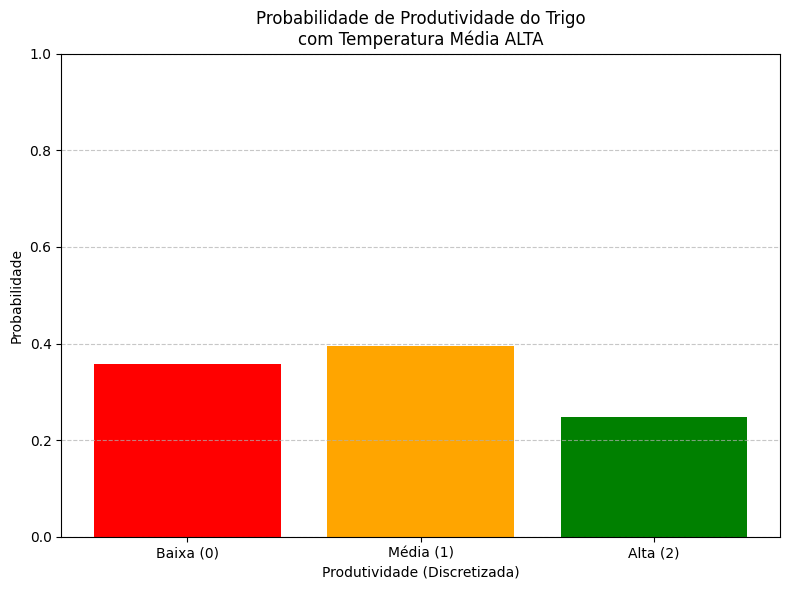

In [ ]:
# Extrair as probabilidades para plotagem
probs_trigo = resultado_trigo_temp_alta.values

# Plotar o gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
cores = ['red', 'orange', 'green']  # cores para baixa, média e alta produtividade

plt.bar(['Baixa (0)', 'Média (1)', 'Alta (2)'], probs_trigo, color=cores)
plt.xlabel("Produtividade (Discretizada)")
plt.ylabel("Probabilidade")
plt.title("Probabilidade de Produtividade do Trigo\ncom Temperatura Média ALTA")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


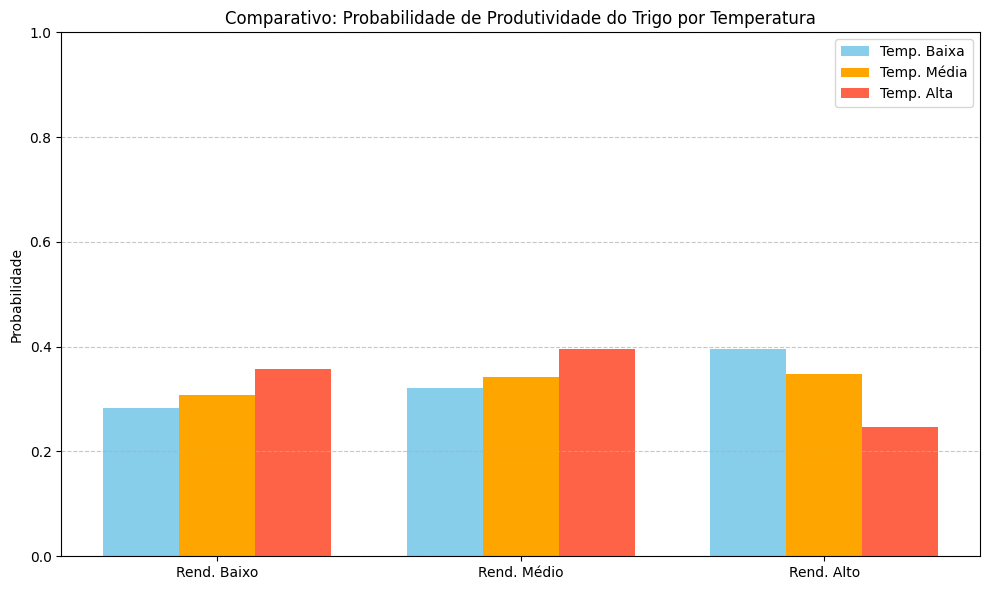

In [ ]:
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination

# Obter probabilidades para os três cenários
probs_baixa = inferencia_trigo.query(
    variables=['Rendimento Médio (kg/ha)'],
    evidence={'Temperatura Media': 0}
).values

probs_media = inferencia_trigo.query(
    variables=['Rendimento Médio (kg/ha)'],
    evidence={'Temperatura Media': 1}
).values

probs_alta = inferencia_trigo.query(
    variables=['Rendimento Médio (kg/ha)'],
    evidence={'Temperatura Media': 2}
).values

# Organizar dados para gráfico
categorias = ['Baixa (0)', 'Média (1)', 'Alta (2)']
x = range(len(categorias))
largura = 0.25

# Plotar gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
plt.bar([p - largura for p in x], probs_baixa, width=largura, label='Temp. Baixa', color='skyblue')
plt.bar(x, probs_media, width=largura, label='Temp. Média', color='orange')
plt.bar([p + largura for p in x], probs_alta, width=largura, label='Temp. Alta', color='tomato')

plt.xticks(x, ['Rend. Baixo', 'Rend. Médio', 'Rend. Alto'])
plt.ylabel('Probabilidade')
plt.title('Comparativo: Probabilidade de Produtividade do Trigo por Temperatura')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-23-26a383c3038f>:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


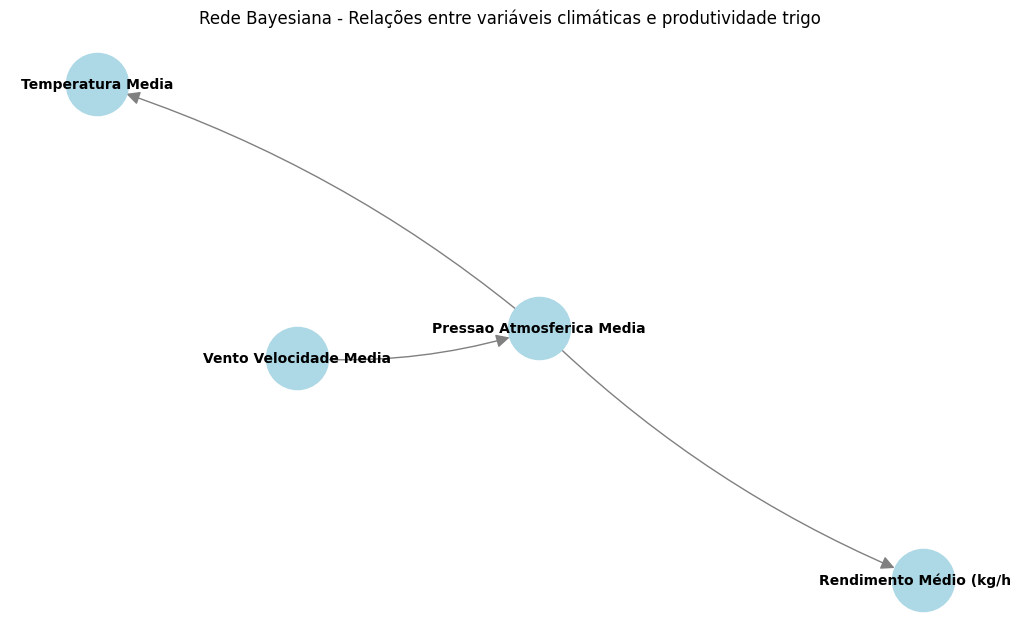

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Criar grafo direcionado com as relações aprendidas para o trigo
G_trigo = nx.DiGraph()
G_trigo.add_edges_from(rede_bayesiana_trigo.edges())

# Layout dos nós
pos = nx.spring_layout(G_trigo, seed=13)

# Plotar grafo com setas visíveis
plt.figure(figsize=(10, 6))
nx.draw(
    G_trigo,
    pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2000,
    font_size=10,
    font_weight='bold',
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    connectionstyle='arc3,rad=0.1'  # Deixa as arestas mais curvas
)

plt.title("Rede Bayesiana - Relações entre variáveis climáticas e produtividade trigo")
plt.axis('off')
plt.tight_layout()
plt.show()


## 📈 Regressão Linear: Temperatura vs Produtividade da Trigo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


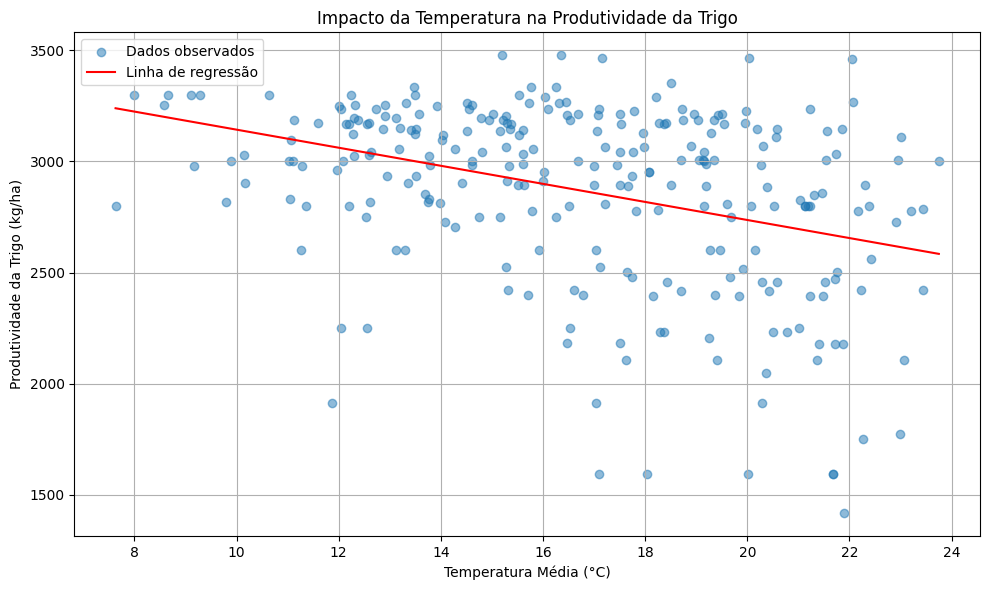

Coeficiente (variação por °C): -40.64 kg/ha
Intercepto: 3549.60


In [ ]:
from sklearn.linear_model import LinearRegression

# Regressão linear
X_trigo = df_trigo[['Temperatura Media']]
y_trigo = df_trigo['Rendimento Médio (kg/ha)']

modelo_trigo = LinearRegression()
modelo_trigo.fit(X_trigo, y_trigo)

# Coeficiente e intercepto
coef_temp_trigo = modelo_trigo.coef_[0]
intercepto_trigo = modelo_trigo.intercept_

# Previsões para gráfico
temperaturas_simuladas_trigo = np.linspace(X_trigo.min(), X_trigo.max(), 100).reshape(-1, 1)
produtividade_prevista_trigo = modelo_trigo.predict(temperaturas_simuladas_trigo)

# Gráfico da regressão linear
plt.figure(figsize=(10, 6))
plt.scatter(X_trigo, y_trigo, alpha=0.5, label='Dados observados')
plt.plot(temperaturas_simuladas_trigo, produtividade_prevista_trigo, color='red', label='Linha de regressão')
plt.xlabel("Temperatura Média (°C)")
plt.ylabel("Produtividade da Trigo (kg/ha)")
plt.title("Impacto da Temperatura na Produtividade da Trigo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Coeficiente (variação por °C): {coef_temp_trigo:.2f} kg/ha")
print(f"Intercepto: {intercepto_trigo:.2f}")


In [ ]:
# Comparativo entre modelos: Regressão Linear x Rede Bayesiana

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from pgmpy.metrics import log_likelihood_score

X = df_trigo[['Temperatura Media', 'Precipitacao Total', 'Pressao Atmosferica Media', 'Vento Velocidade Media']]
y = df_trigo['Rendimento Médio (kg/ha)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)
y_pred = modelo_rl.predict(X_test)

mae_rl = mean_absolute_error(y_test, y_pred)
rmse_rl = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rl = r2_score(y_test, y_pred)

score = log_likelihood_score(rede_bayesiana_trigo, df_teste_trigo)

print("### COMPARATIVO DE MODELOS - TRIGO ###")
print(f"Regressão Linear -> R²: {r2_rl:.4f} | MAE: {mae_rl:.2f} | RMSE: {rmse_rl:.2f}")
print(f"Rede Bayesiana   -> Log-Likelihood no teste: {score:.2f}")


### COMPARATIVO DE MODELOS - TRIGO ###
Regressão Linear -> R²: 0.1468 | MAE: 296.38 | RMSE: 381.17
Rede Bayesiana   -> Log-Likelihood no teste: -337.91


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from pgmpy.inference import VariableElimination

# Definir valores discretos
valores_discretos = [1, 2, 3]

# Configurar inferência
infer = VariableElimination(rede_bayesiana_trigo)

# Realizar inferência para cálculo do valor esperado
predicoes = []
reais = df_teste_trigo['Rendimento Médio (kg/ha)'].tolist()

for _, row in df_teste_trigo.iterrows():
    evidencia = row.drop('Rendimento Médio (kg/ha)').to_dict()
    try:
        dist = infer.query(variables=['Rendimento Médio (kg/ha)'], evidence=evidencia).values
        esperado = sum([v * p for v, p in zip(valores_discretos, dist)])
        predicoes.append(esperado)
    except:
        continue

if len(predicoes) < len(reais):
    reais = reais[:len(predicoes)]

# Cálculo das métricas
mae_bayes = mean_absolute_error(reais, predicoes)
rmse_bayes = mean_squared_error(reais, predicoes) ** 0.5

print(f"MAE da Rede Bayesiana: {mae_bayes:.2f}")
print(f"RMSE da Rede Bayesiana: {rmse_bayes:.2f}")


MAE da Rede Bayesiana: 1.00
RMSE da Rede Bayesiana: 1.22
